<a href="https://colab.research.google.com/github/aliakbarbadri/mountain-car-v0/blob/master/random.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install the packages and Show the video

In [1]:
!apt-get install python-opengl -y
!apt install xvfb -y
!pip install pyvirtualdisplay
!pip install pyglet

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-opengl is already the newest version (3.1.0+dfsg-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.4).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [2]:
import matplotlib.animation
from IPython.display import HTML
from IPython.display import display as ipy_disp
import tensorflow as tf
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import gym
import random

In [3]:
def get_screen():
  global display
  try:
    display.stop()
  except:
    pass
  from pyvirtualdisplay import Display
  display = Display(visible=0, size=(1400, 900))
  display.start()

get_screen()

In [4]:
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
HW_ID = "rl"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", HW_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [5]:
def plot_environment(env, figsize=(5,4)):
    plt.figure(figsize=figsize)
    img = env.render(mode="rgb_array")
    plt.imshow(img)
    plt.axis("off")
    return img

In [6]:
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim

# Setup the Env

In [7]:
env = gym.make('MountainCar-v0')

In [8]:
env.seed(42)
obs = env.reset()
obs
# obs = array([position, velocity])
# position = [-1.2 , 0.6]
# velocity = [-0.07,	0.07]

array([-0.52517132,  0.        ])

In [9]:
env.action_space
# 0	push left
# 1	no push
# 2	push right

Discrete(3)

In [10]:
action = 0
obs, reward, done, info = env.step(action)
obs, reward, done, info

(array([-0.52615953, -0.00098821]), -1.0, False, {})

In [11]:
img = env.render(mode="rgb_array")
img.shape

(400, 600, 3)

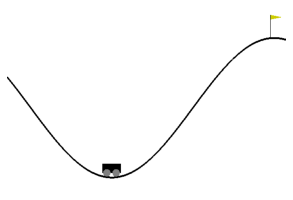

In [12]:
plot_environment(env)
plt.show()

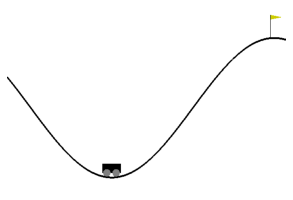

In [13]:
plot_environment(env)
plt.show()

# Random Actions

In [22]:
env.seed(42)

frames = []
obs = env.reset()
for step in range(200):
    img = env.render(mode="rgb_array")
    frames.append(img)
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    print("obs", obs)
    print("action", action)
    if done:
        break

obs [-5.25159530e-01  1.17940721e-05]
action 1
obs [-5.25136031e-01  2.34996896e-05]
action 1
obs [-5.25101002e-01  3.50290614e-05]
action 1
obs [-5.25054706e-01  4.62957179e-05]
action 1
obs [-5.24997491e-01  5.72151600e-05]
action 1
obs [-0.52392979  0.00106771]
action 2
obs [-0.5228596   0.00107019]
action 1
obs [-5.22794953e-01  6.46442298e-05]
action 0
obs [-5.22736337e-01  5.86155653e-05]
action 1
obs [-0.52168419  0.00105215]
action 2
obs [-0.5206464   0.00103779]
action 1
obs [-0.51963076  0.00101565]
action 1
obs [-5.19644871e-01 -1.41139788e-05]
action 0
obs [-0.51868864  0.00095623]
action 2
obs [-0.51676923  0.00191941]
action 2
obs [-0.51590104  0.00086819]
action 0
obs [-5.16090579e-01 -1.89538156e-04]
action 0
obs [-0.51733642 -0.00124584]
action 0
obs [-5.17629233e-01 -2.92809746e-04]
action 2
obs [-0.51696681  0.00066242]
action 2
obs [-0.51635413  0.00061268]
action 1
obs [-0.51479577  0.00155835]
action 2
obs [-0.51230343  0.00249234]
action 2
obs [-0.50889579  0.003

In [23]:
plot_animation(frames)

In [16]:
env.seed(42)

random_rawards = []
for episode in range(200):
  obs = env.reset()
  for step in range(200):
      img = env.render(mode="rgb_array")
      action = env.action_space.sample()
      obs, reward, done, info = env.step(action)
      if done:
          break
  random_rawards.append(step+1)
  print("\rEpisode: {}, Steps: {}".format(episode, step + 1), end="")

Episode: 199, Steps: 200

Saving figure dqn_rewards_plot


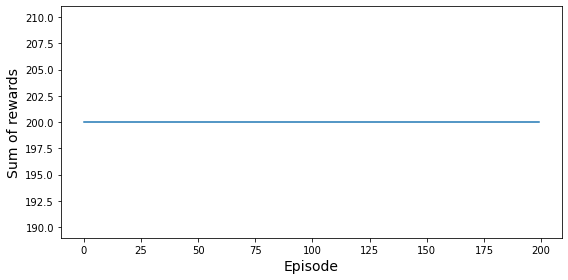

In [17]:
plt.figure(figsize=(8, 4))
plt.plot(random_rawards)
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Sum of rewards", fontsize=14)
save_fig("dqn_rewards_plot")
plt.show()

In [20]:
print("mean reward",np.mean(random_rawards),", best reward:",np.min(random_rawards),", first win episode:",np.argmin(random_rawards))

mean reward 200.0 , best reward: 200 , first win episode: 0
